In [1]:
#From the chapter 14 (Graph.py)
class Graph:
  """Representation of a simple graph using an adjacency map."""

  #------------------------- nested Vertex class -------------------------
  class Vertex:
    """Lightweight vertex structure for a graph."""
    __slots__ = '_element'
  
    def __init__(self, x):
      """Do not call constructor directly. Use Graph's insert_vertex(x)."""
      self._element = x
  
    def element(self):
      """Return element associated with this vertex."""
      return self._element
  
    def __hash__(self):         # will allow vertex to be a map/set key
      return hash(id(self))

    def __str__(self):
      return str(self._element)
    
  #------------------------- nested Edge class -------------------------
  class Edge:
    """Lightweight edge structure for a graph."""
    __slots__ = '_origin', '_destination', '_element'
  
    def __init__(self, u, v, x):
      """Do not call constructor directly. Use Graph's insert_edge(u,v,x)."""
      self._origin = u
      self._destination = v
      self._element = x
  
    def endpoints(self):
      """Return (u,v) tuple for vertices u and v."""
      return (self._origin, self._destination)
  
    def opposite(self, v):
      """Return the vertex that is opposite v on this edge."""
      if not isinstance(v, Graph.Vertex):
        raise TypeError('v must be a Vertex')
      return self._destination if v is self._origin else self._origin
      raise ValueError('v not incident to edge')
  
    def element(self):
      """Return element associated with this edge."""
      return self._element
  
    def __hash__(self):         # will allow edge to be a map/set key
      return hash( (self._origin, self._destination) )

    def __str__(self):
      return '({0},{1},{2})'.format(self._origin,self._destination,self._element)
    
  #------------------------- Graph methods -------------------------
  def __init__(self, directed=False):
    """Create an empty graph (undirected, by default).

    Graph is directed if optional paramter is set to True.
    """
    self._outgoing = {}
    # only create second map for directed graph; use alias for undirected
    self._incoming = {} if directed else self._outgoing

  def _validate_vertex(self, v):
    """Verify that v is a Vertex of this graph."""
    if not isinstance(v, self.Vertex):
      raise TypeError('Vertex expected')
    if v not in self._outgoing:
      raise ValueError('Vertex does not belong to this graph.')
    
  def is_directed(self):
    """Return True if this is a directed graph; False if undirected.

    Property is based on the original declaration of the graph, not its contents.
    """
    return self._incoming is not self._outgoing # directed if maps are distinct

  def vertex_count(self):
    """Return the number of vertices in the graph."""
    return len(self._outgoing)

  def vertices(self):
    """Return an iteration of all vertices of the graph."""
    return self._outgoing.keys()

  def edge_count(self):
    """Return the number of edges in the graph."""
    total = sum(len(self._outgoing[v]) for v in self._outgoing)
    # for undirected graphs, make sure not to double-count edges
    return total if self.is_directed() else total // 2

  def edges(self):
    """Return a set of all edges of the graph."""
    result = set()       # avoid double-reporting edges of undirected graph
    for secondary_map in self._outgoing.values():
      result.update(secondary_map.values())    # add edges to resulting set
    return result

  def get_edge(self, u, v):
    """Return the edge from u to v, or None if not adjacent."""
    self._validate_vertex(u)
    self._validate_vertex(v)
    return self._outgoing[u].get(v)        # returns None if v not adjacent

  def degree(self, v, outgoing=True):   
    """Return number of (outgoing) edges incident to vertex v in the graph.

    If graph is directed, optional parameter used to count incoming edges.
    """
    self._validate_vertex(v)
    adj = self._outgoing if outgoing else self._incoming
    return len(adj[v])

  def incident_edges(self, v, outgoing=True):   
    """Return all (outgoing) edges incident to vertex v in the graph.

    If graph is directed, optional parameter used to request incoming edges.
    """
    self._validate_vertex(v)
    adj = self._outgoing if outgoing else self._incoming
    for edge in adj[v].values():
      yield edge

  def insert_vertex(self, x=None):
    """Insert and return a new Vertex with element x."""
    v = self.Vertex(x)
    self._outgoing[v] = {}
    if self.is_directed():
      self._incoming[v] = {}        # need distinct map for incoming edges
    return v
      
  def insert_edge(self, u, v, x=None):
    """Insert and return a new Edge from u to v with auxiliary element x.

    Raise a ValueError if u and v are not vertices of the graph.
    Raise a ValueError if u and v are already adjacent.
    """
    if self.get_edge(u, v) is not None:      # includes error checking
      raise ValueError('u and v are already adjacent')
    e = self.Edge(u, v, x)
    self._outgoing[u][v] = e
    self._incoming[v][u] = e


In [2]:
#from the chapter 14 (graph_examples.py)

def graph_from_edgelist(E, directed=False):
  """Make a graph instance based on a sequence of edge tuples.

  Edges can be either of from (origin,destination) or
  (origin,destination,element). Vertex set is presume to be those
  incident to at least one edge.

  vertex labels are assumed to be hashable.
  """
  g = Graph(directed)
  V = set()
  for e in E:
    V.add(e[0])
    V.add(e[1])

  verts = {}  # map from vertex label to Vertex instance
  for v in V:
    verts[v] = g.insert_vertex(v)

  for e in E:
    src = e[0]
    dest = e[1]
    element = e[2] if len(e) > 2 else None
    g.insert_edge(verts[src],verts[dest],element)

  return g

def simple_example():
    E = (
    ('Seoul', 'Daejon'), ('Daejon','Busan'), ('Busan', 'Daejon'),
    ('Daejon', 'Suwon'), ('Suwon', 'Seoul'), ('Seoul', 'Gwangju'),
    ('Gwangju', 'Suwon'))
    return graph_from_edgelist(E, True)



def figure_14_3():
  """Return the unweighted, directed graph from Figure 14.3 of DSAP."""
  E = (
    ('BOS','SFO'), ('BOS','JFK'), ('BOS','MIA'), ('JFK','BOS'),
    ('JFK','DFW'), ('JFK','MIA'), ('JFK','SFO'), ('ORD','DFW'),
    ('ORD','MIA'), ('LAX','ORD'), ('DFW','SFO'), ('DFW','ORD'),
    ('DFW','LAX'), ('MIA','DFW'), ('MIA','LAX'),
    )
  return graph_from_edgelist(E, True)




In [3]:
graph_korea = simple_example()

In [4]:
#Get the data from incoming (the other is outgoing)
incoming = dict(graph_korea._incoming)

In [5]:
for k,v in incoming.items():
    print (k.element())
    for k1, v1 in v.items():
        print (" ",k1.element())
        print (" ", v1)

Seoul
  Suwon
  (Suwon,Seoul,None)
Gwangju
  Seoul
  (Seoul,Gwangju,None)
Suwon
  Daejon
  (Daejon,Suwon,None)
  Gwangju
  (Gwangju,Suwon,None)
Daejon
  Seoul
  (Seoul,Daejon,None)
  Busan
  (Busan,Daejon,None)
Busan
  Daejon
  (Daejon,Busan,None)


In [6]:
outgoing = dict(graph_korea._outgoing)

In [8]:
for k,v in outgoing.items():
    print (k.element())
    for k1, v1 in v.items():
        print (" ",k1.element())
        print (" ", v1)

Busan
  Daejon
  (Busan,Daejon,None)
Daejon
  Busan
  (Daejon,Busan,None)
  Suwon
  (Daejon,Suwon,None)
Suwon
  Seoul
  (Suwon,Seoul,None)
Gwangju
  Suwon
  (Gwangju,Suwon,None)
Seoul
  Daejon
  (Seoul,Daejon,None)
  Gwangju
  (Seoul,Gwangju,None)


BOS : Boston
SFO : San Francisco
JFK : John F Kennedy (New York)
MIA : Miami
DFW : Dallas / Fort Worth
LAX : Los Angeles
ORD : O'Hare (Illinois)

In [9]:
graph1 = figure_14_3()

In [10]:
incoming = dict(graph1._incoming)

In [11]:
for k,v in incoming.items():
    print (k.element())
    for k1, v1 in v.items():
        print (" ",k1.element())
        print (" ", v1)

BOS
  JFK
  (JFK,BOS,None)
ORD
  LAX
  (LAX,ORD,None)
  DFW
  (DFW,ORD,None)
MIA
  BOS
  (BOS,MIA,None)
  JFK
  (JFK,MIA,None)
  ORD
  (ORD,MIA,None)
SFO
  BOS
  (BOS,SFO,None)
  JFK
  (JFK,SFO,None)
  DFW
  (DFW,SFO,None)
DFW
  JFK
  (JFK,DFW,None)
  ORD
  (ORD,DFW,None)
  MIA
  (MIA,DFW,None)
JFK
  BOS
  (BOS,JFK,None)
LAX
  DFW
  (DFW,LAX,None)
  MIA
  (MIA,LAX,None)


In [12]:
outgoing = dict(graph1._outgoing)

In [13]:
for k,v in outgoing.items():
    print (k.element())
    for k1, v1 in v.items():
        print (" ",k1.element())
        print (" ", v1)

BOS
  SFO
  (BOS,SFO,None)
  JFK
  (BOS,JFK,None)
  MIA
  (BOS,MIA,None)
ORD
  DFW
  (ORD,DFW,None)
  MIA
  (ORD,MIA,None)
MIA
  DFW
  (MIA,DFW,None)
  LAX
  (MIA,LAX,None)
SFO
DFW
  SFO
  (DFW,SFO,None)
  ORD
  (DFW,ORD,None)
  LAX
  (DFW,LAX,None)
JFK
  BOS
  (JFK,BOS,None)
  DFW
  (JFK,DFW,None)
  MIA
  (JFK,MIA,None)
  SFO
  (JFK,SFO,None)
LAX
  ORD
  (LAX,ORD,None)


In [14]:
def figure_14_14():
  """Return the weighted, undirected graph from Figure 14.14 of DSAP."""
  E = (
    ('SFO', 'LAX', 337), ('SFO', 'BOS', 2704), ('SFO', 'ORD', 1846),
    ('SFO', 'DFW', 1464), ('LAX', 'DFW', 1235), ('LAX', 'MIA', 2342),
    ('DFW', 'ORD', 802), ('DFW', 'MIA', 1121), ('ORD', 'BOS', 867),
    ('ORD', 'JFK', 740), ('MIA', 'JFK', 1090), ('MIA', 'BOS', 1258), 
    ('JFK', 'BOS', 187),
    )
  return graph_from_edgelist(E, False)

In [15]:
graph2 = figure_14_14()

In [16]:
incoming = dict(graph2._incoming)

In [17]:
for k,v in incoming.items():
    print (k.element())
    for k1, v1 in v.items():
        print (" ",k1.element())
        print (" ", v1)

BOS
  SFO
  (SFO,BOS,2704)
  ORD
  (ORD,BOS,867)
  MIA
  (MIA,BOS,1258)
  JFK
  (JFK,BOS,187)
ORD
  SFO
  (SFO,ORD,1846)
  DFW
  (DFW,ORD,802)
  BOS
  (ORD,BOS,867)
  JFK
  (ORD,JFK,740)
SFO
  LAX
  (SFO,LAX,337)
  BOS
  (SFO,BOS,2704)
  ORD
  (SFO,ORD,1846)
  DFW
  (SFO,DFW,1464)
MIA
  LAX
  (LAX,MIA,2342)
  DFW
  (DFW,MIA,1121)
  JFK
  (MIA,JFK,1090)
  BOS
  (MIA,BOS,1258)
DFW
  SFO
  (SFO,DFW,1464)
  LAX
  (LAX,DFW,1235)
  ORD
  (DFW,ORD,802)
  MIA
  (DFW,MIA,1121)
JFK
  ORD
  (ORD,JFK,740)
  MIA
  (MIA,JFK,1090)
  BOS
  (JFK,BOS,187)
LAX
  SFO
  (SFO,LAX,337)
  DFW
  (LAX,DFW,1235)
  MIA
  (LAX,MIA,2342)


# Depth-First Search

In [18]:
#From Chapter 14 (dfs.py)
def DFS(g, u, discovered):
  """Perform DFS of the undiscovered portion of Graph g starting at Vertex u.

  discovered is a dictionary mapping each vertex to the edge that was used to
  discover it during the DFS. (u should be "discovered" prior to the call.)
  Newly discovered vertices will be added to the dictionary as a result.
  """
  for e in g.incident_edges(u):    # for every outgoing edge from u
    v = e.opposite(u)
    if v not in discovered:        # v is an unvisited vertex
      discovered[v] = e            # e is the tree edge that discovered v
      DFS(g, v, discovered)        # recursively explore from v

def construct_path(u, v, discovered):
  """
  Return a list of vertices comprising the directed path from u to v,
  or an empty list if v is not reachable from u.

  discovered is a dictionary resulting from a previous call to DFS started at u.
  """
  path = []                        # empty path by default
  if v in discovered:
    # we build list from v to u and then reverse it at the end
    path.append(v)
    walk = v
    while walk is not u:
      e = discovered[walk]         # find edge leading to walk
      parent = e.opposite(walk)
      path.append(parent)
      walk = parent
    path.reverse()                 # reorient path from u to v
  return path

def DFS_complete(g):
  """Perform DFS for entire graph and return forest as a dictionary.

  Result maps each vertex v to the edge that was used to discover it.
  (Vertices that are roots of a DFS tree are mapped to None.)
  """
  forest = {}
  for u in g.vertices():
    if u not in forest:
      forest[u] = None             # u will be the root of a tree
      DFS(g, u, forest)
  return forest


In [19]:
dfs_incoming_simple = DFS_complete(graph_korea)

In [20]:
for k, v in dfs_incoming_simple.items():
    print (k.element())
    print (" ",v)

Busan
  None
Daejon
  (Busan,Daejon,None)
Suwon
  (Daejon,Suwon,None)
Seoul
  (Suwon,Seoul,None)
Gwangju
  (Seoul,Gwangju,None)


In [21]:
dfs_incoming = DFS_complete(graph1) #, list_incoming[0])

In [22]:
for k, v in dfs_incoming.items():
    print (k.element())
    print (" ",v)

BOS
  None
SFO
  (BOS,SFO,None)
JFK
  (BOS,JFK,None)
DFW
  (JFK,DFW,None)
ORD
  (DFW,ORD,None)
MIA
  (ORD,MIA,None)
LAX
  (MIA,LAX,None)


In [23]:
dfs_incoming2 = DFS_complete(graph2)

In [24]:
for k, v in dfs_incoming2.items():
    print (k.element())
    print (" ",v)

BOS
  None
SFO
  (SFO,BOS,2704)
LAX
  (SFO,LAX,337)
DFW
  (LAX,DFW,1235)
ORD
  (DFW,ORD,802)
JFK
  (ORD,JFK,740)
MIA
  (MIA,JFK,1090)


# Breadth First Search

In [25]:
# Copyright 2013, Michael H. Goldwasser
#
# Developed for use with the book:
#
#    Data Structures and Algorithms in Python
#    Michael T. Goodrich, Roberto Tamassia, and Michael H. Goldwasser
#    John Wiley & Sons, 2013
#
# This program is free software: you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.
#
# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU General Public License for more details.
#
# You should have received a copy of the GNU General Public License
# along with this program.  If not, see <http://www.gnu.org/licenses/>.

def BFS(g, s, discovered):
  """Perform BFS of the undiscovered portion of Graph g starting at Vertex s.

  discovered is a dictionary mapping each vertex to the edge that was used to
  discover it during the BFS (s should be mapped to None prior to the call).
  Newly discovered vertices will be added to the dictionary as a result.
  """
  level = [s]                        # first level includes only s
  while len(level) > 0:
    next_level = []                  # prepare to gather newly found vertices
    for u in level:
      for e in g.incident_edges(u):  # for every outgoing edge from u
        v = e.opposite(u)
        if v not in discovered:      # v is an unvisited vertex
          discovered[v] = e          # e is the tree edge that discovered v
          next_level.append(v)       # v will be further considered in next pass
    level = next_level               # relabel 'next' level to become current

def BFS_complete(g):
  """Perform BFS for entire graph and return forest as a dictionary.

  Result maps each vertex v to the edge that was used to discover it.
  (vertices that are roots of a BFS tree are mapped to None).
  """
  forest = {}
  for u in g.vertices():
    if u not in forest:
      forest[u] = None            # u will be a root of a tree
      BFS(g, u, forest)
  return forest


In [26]:
bfs_incoming_simple = BFS_complete(graph_korea)

In [27]:
for k, v in bfs_incoming_simple.items():
    print (k.element())
    print (" ",v)

Busan
  None
Daejon
  (Busan,Daejon,None)
Suwon
  (Daejon,Suwon,None)
Seoul
  (Suwon,Seoul,None)
Gwangju
  (Seoul,Gwangju,None)


In [28]:
bfs_incoming = BFS_complete(graph1) #, list_incoming[0])

In [29]:
for k, v in bfs_incoming.items():
    print (k.element())
    print (" ",v)

BOS
  None
SFO
  (BOS,SFO,None)
JFK
  (BOS,JFK,None)
MIA
  (BOS,MIA,None)
DFW
  (JFK,DFW,None)
LAX
  (MIA,LAX,None)
ORD
  (DFW,ORD,None)


In [30]:
bfs_incoming2 = BFS_complete(graph2)

In [31]:
for k, v in bfs_incoming2.items():
    print (k.element())
    print (" ",v)

BOS
  None
SFO
  (SFO,BOS,2704)
ORD
  (ORD,BOS,867)
MIA
  (MIA,BOS,1258)
JFK
  (JFK,BOS,187)
LAX
  (SFO,LAX,337)
DFW
  (SFO,DFW,1464)


## Create a graph randomly

In [32]:
import networkx as nx

In [33]:
from networkx import gnm_random_graph

n = 10  # 10 nodes
m = 30  # 30 edges

G = gnm_random_graph(n, m)

# iterate over all edges
with open('./test.edgelist', 'w') as f:
    for edge in G.edges():
        f.write("g1.addEdge{0}\n".format(edge))

Create 10 nodes and 30 edges

In [44]:
from networkx import gnm_random_graph

n = 10  # 10 nodes
m = 30  # 30 edges

G = gnm_random_graph(n, m)

# iterate over all edges
LL = [] #list of data라는 뜻
for edge in G.edges():
    LL.append(edge)

For generating the graph, the list is converted into tuple.

In [45]:
LLTuple = tuple(LL)

In [46]:
LLTuple

((0, 7),
 (0, 3),
 (0, 9),
 (0, 2),
 (0, 1),
 (1, 3),
 (1, 7),
 (1, 5),
 (1, 2),
 (2, 5),
 (2, 7),
 (2, 6),
 (2, 8),
 (2, 4),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 9),
 (3, 8),
 (4, 8),
 (4, 9),
 (4, 5),
 (4, 7),
 (5, 7),
 (5, 8),
 (6, 7),
 (6, 9),
 (7, 8),
 (7, 9))

The graph is generated using the function `graph_from_edgelist`

In [47]:
graph_random01 = graph_from_edgelist(LLTuple, True)

As we learnt in the Chapter 03, we can calculate the run time of an algorithm

In [48]:
# from time import time
# def run_time(fn, S):
#     start_time = time()
#     fn(S)
#     end_time = time()
#     elapsed = end_time - start_time
#     return elapsed

Create the 2nd random graph with nodes = 100 and edges = 300

In [49]:
n = 100  # 100 nodes
m = 300  # 300 edges

G100 = gnm_random_graph(n, m)

# iterate over all edges
LL100 = []
for edge in G100.edges():
    LL100.append(edge)

LLT100 = tuple(LL100)
graph_random02 = graph_from_edgelist(LLT100, True)    

Create the 3rd random graph with nodes = 1000 and edges = 3000

In [50]:
n = 1000  # 1000 nodes
m = 3000  # 3000 edges

G1000 = gnm_random_graph(n, m)

# iterate over all edges
LL1000 = []
for edge in G1000.edges():
    LL1000.append(edge)

LLT1000 = tuple(LL1000)
graph_random03 = graph_from_edgelist(LLT1000, True)  

We can check the runtime performance test for DFS

In [52]:
from time import time
def run_time(fn):
    start_time = time()
    DFS_complete(fn)
    end_time = time()
    elapsed = end_time - start_time
    return elapsed


Suppose we want to check the runtime performance of 5 data;
- graph_korea
- graph_random01
- graph_random02
- graph_random03
- graph_random04

In [53]:
t1 = run_time(graph_korea)

In [54]:
t2 = run_time(graph_random01)

In [55]:
t3 = run_time(graph_random02)

In [56]:
t4 = run_time(graph_random03)

In [57]:
t4 #check the time performance of graph_random03

0.009971141815185547

Create one more random data with node = 10000 and edges = 30000

In [58]:
n = 10000  # 10000 nodes
m = 30000  # 30000 edges

G10000 = gnm_random_graph(n, m)

# iterate over all edges
LL10000 = []
for edge in G10000.edges():
    LL10000.append(edge)

LLT10000 = tuple(LL10000)
graph_random04 = graph_from_edgelist(LLT10000, True)  

In [59]:
t5 = run_time(graph_random04)

In [60]:
t5

0.10204529762268066

Append the data into a list for data plot

In [61]:
testDFS = []
testDFS.append(t1)
testDFS.append(t2)
testDFS.append(t3)
testDFS.append(t4)
testDFS.append(t5)


We want to compare the performance of DFS and BFS. Therefore, we need to check the runtime performance for BFS as well. 

In [62]:
def run_time(fn):
    start_time = time()
    BFS_complete(fn)
    end_time = time()
    elapsed = end_time - start_time
    return elapsed

In [63]:
s1 = run_time(graph_korea)
s2 = run_time(graph_random01)
s3 = run_time(graph_random02)
s4 = run_time(graph_random03)
s5 = run_time(graph_random04)

In [64]:
testBFS = []
testBFS.append(s1)
testBFS.append(s2)
testBFS.append(s3)
testBFS.append(s4)
testBFS.append(s5)

After getting the runtime for both DFS and BFS, we can plot and compare the time performance of both algorithms

First, set the X axis by defining the number of data.

In [65]:
x = [5, 10, 100, 1000, 10000]

Check the testDFS list for the time performance of DFS algorithm

In [66]:
testDFS

[0.0, 0.0, 0.0009961128234863281, 0.009971141815185547, 0.10204529762268066]

Using the library matplotlib, we can plot the time performance of DFS

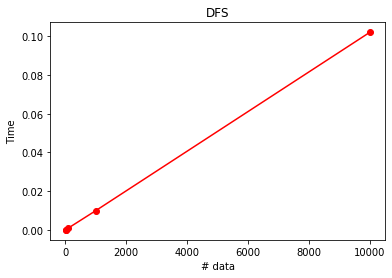

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt
import pylab

pylab.xlabel('# data')
pylab.ylabel('Time')

plt.title("DFS")
plt.plot(x, testDFS, "ro-")
plt.show()

In order to compare with BFS, we can plot the two time performance into one graph. DFS will be plotted using RED and BFS will be plotted using BLUE.

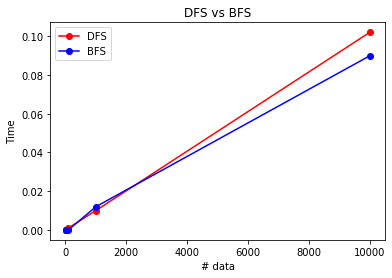

In [68]:
pylab.xlabel('# data')
pylab.ylabel('Time')

plt.title("DFS vs BFS")
plt.plot(x, testDFS, "ro-", c="red")
plt.plot(x, testBFS, "ro-",c="blue")
plt.legend(["DFS", "BFS"], loc='upper left')
plt.show()

In conclusion, the time performance of BFS is slightly higher than DFS when the number of data increases.

I am using laptop with the specification i5 with 16Gb RAM
Big Oh is the thing we need to consider for this kind analysis